In [23]:
import pandas as pd

In [24]:
pd.DataFrame({'yes':['a','b'],'no':['c','d']})

,yes,no
0,a,c
1,b,d


In [25]:
pd.Series([30,40,50])

0    30
1    40
2    50
dtype: int64

In [28]:
df=pd.read_excel("Data_Train.xlsx")

In [29]:
df.shape

(10683, 11)

In [30]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [33]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [34]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [35]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [36]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [37]:
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [38]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [39]:
df['Journey_Hour'] = df['Dep_Time'].dt.hour

In [40]:
df['Journey_Minute'] = df['Dep_Time'].dt.minute

In [41]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [42]:
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [43]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

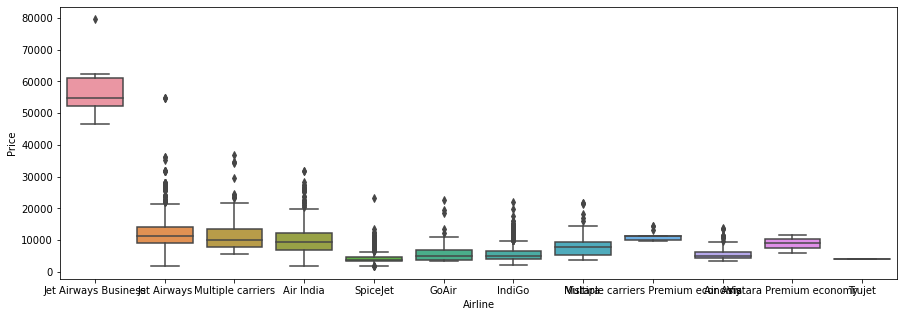

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

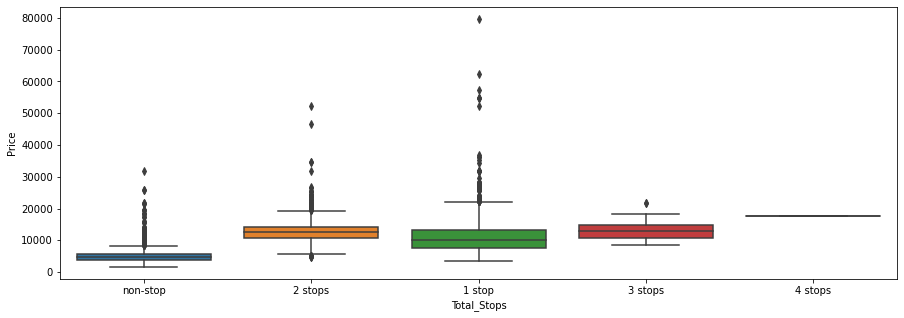

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [47]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

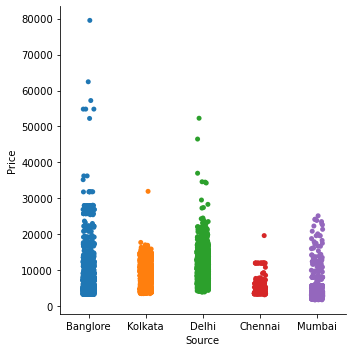

In [49]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=df)

In [50]:
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1080x360 with 0 Axes>

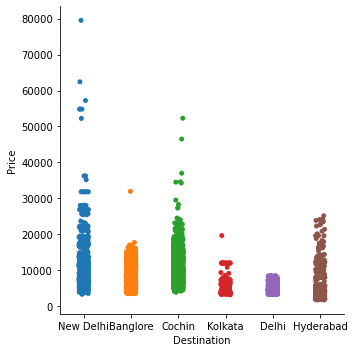

In [52]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Destination',data=df)

In [53]:
Destination = pd.get_dummies(df['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
df.drop('Additional_Info',axis=1,inplace=True)

In [55]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [56]:
df['Route_1'] = df['Route'].str.split('?').str[0]
df['Route_2'] = df['Route'].str.split('?').str[1]
df['Route_3'] = df['Route'].str.split('?').str[2]
df['Route_4'] = df['Route'].str.split('?').str[3]
df['Route_5'] = df['Route'].str.split('?').str[4]

In [57]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()

In [60]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i] = encoder.fit_transform(df[i])

In [61]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,18,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9,9,25,4,25,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,29,0,0,0,0


In [62]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
dic = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [64]:
df['Total_Stops'] = df['Total_Stops'].map(dic)

In [65]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,18,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2,13882,6,9,9,25,4,25,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1,6218,5,12,18,5,23,30,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1,13302,3,1,16,50,21,35,29,0,0,0,0


In [66]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i]+' 0m'
        else:
            duration[i] = '0h ' + duration[i] 

In [67]:
df['Duration'] = duration

In [94]:
'2h 50m eger xdgtr fdbr'.split(' ')[0][0:-1]

'2'

In [69]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [70]:
df['Duration_hours'] = df['Duration'].apply(hour)
df['Duration_mins'] = df['Duration'].apply(min)

In [71]:
df.drop('Duration',axis=1,inplace=True)

In [72]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_Day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Route_5                    int32
Duration_hours            object
Duration_mins             object
dtype: object

In [73]:
df['Duration_hours'] = df['Duration_hours'].astype(int)
df['Duration_mins'] = df['Duration_mins'].astype(int)

In [74]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_Day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Route_5                    int32
Duration_hours             int32
Duration_mins              int32
dtype: object

In [75]:
df = pd.concat([df,Source,Airline,Destination],axis=1)

In [76]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,...,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,...,0,0,0,0,0,0,0,0,0,1


In [77]:
pd.set_option('display.max_columns',35)

In [78]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [79]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,18,0,0,0,0,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,84,0,0,0,0,7,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,118,0,0,0,0,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,91,0,0,0,0,5,25,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,29,0,0,0,0,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Hour',
       'Journey_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Duration_hours',
       'Duration_mins', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [81]:
X = df.drop('Price',axis=1)

In [82]:
y = df['Price']

In [83]:
from sklearn.feature_selection import mutual_info_classif

In [84]:
mutual_info_classif(X,y)

array([2.14382604, 1.09240838, 0.87532098, 1.42873005, 1.20239137,
       1.87305516, 1.52672555, 3.3383267 , 0.01194583, 0.01639694,
       0.        , 0.        , 1.78309844, 1.09679615, 0.16650444,
       1.52580218, 0.86922673, 0.28953241, 0.76194135, 0.08843114,
       0.67657157, 0.91045145, 0.        , 0.57999294, 0.02356003,
       0.32369716, 0.        , 0.22022949, 0.0083182 , 1.51210269,
       0.41254578, 0.29735219, 0.17076092, 0.38379313])

In [85]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [86]:
imp

,0
Total_Stops,2.153805
Journey_Day,1.062571
Journey_Month,0.875721
Journey_Hour,1.425818
Journey_Minute,1.176958
Arrival_Hour,1.852426
Arrival_Minute,1.503302
Route_1,3.352232
Route_2,0.014615
Route_3,0.000000


In [87]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_1,3.352232
Total_Stops,2.153805
Arrival_Hour,1.852426
Duration_hours,1.772551
Cochin,1.594149
Arrival_Minute,1.503302
Delhi,1.486391
Journey_Hour,1.425818
Journey_Minute,1.176958
Duration_mins,1.083810


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [90]:
from sklearn import metrics
import numpy as np

In [101]:
def model(algo):
    my_model =  algo.fit(X_train,y_train)
    print('train_score:',my_model.score(X_train,y_train))
    y_pred = my_model.predict(X_test)
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r2_score:',r2_score)
    mae = metrics.mean_absolute_error(y_test,y_pred)
    print('Mean absolute error:',mae)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE:',rmse)
    sns.distplot(y_test-y_pred)

In [102]:
from sklearn.linear_model import LinearRegression

train_score: 0.617391650273091
r2_score: 0.6530624933368958
Mean absolute error: 1980.0507675039978
RMSE: 2798.0242480345655


C:\Users\nmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


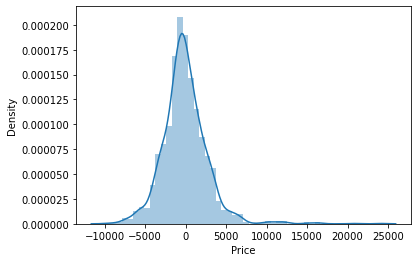

In [103]:
model(LinearRegression())

In [104]:
from sklearn.tree import DecisionTreeRegressor

train_score: 0.9715015850228867
r2_score: 0.6721720699981394
Mean absolute error: 1431.1389642801435
RMSE: 2719.874235035438


C:\Users\nmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


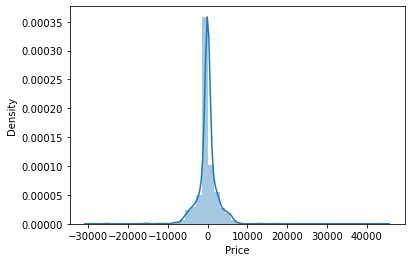

In [105]:
model(DecisionTreeRegressor())

In [106]:
from sklearn.ensemble import RandomForestRegressor

train_score: 0.9532068942189967
r2_score: 0.7867502584896584
Mean absolute error: 1205.8284614366812
RMSE: 2193.6639791810962


C:\Users\nmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


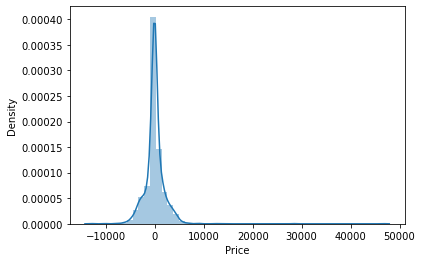

In [107]:
model(RandomForestRegressor())